In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F
from PIL import Image

In [ ]:
import zipfile
import os

zip_file_path = '/content/car_objects.zip'

extract_dir = '/content/car_objects'

if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
        print(f"Contents of {zip_file_path} have been extracted to {extract_dir}")
else:
    print(f"The file {zip_file_path} does not exist.")


Contents of /content/car_objects.zip have been extracted to /content/car_objects


In [ ]:
CNN_MODEL = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 122MB/s]


In [ ]:
CNN_MODEL.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
import os
import cv2
img_dir = '/content/car_objects/data/testing_images'
img_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png'))]
images = [cv2.imread(img) for img in img_files]

In [ ]:
image_tensor = [F.to_tensor(img).unsqueeze(0) for img in images]

In [ ]:
with torch.no_grad():
  prediction = [CNN_MODEL(img) for img in image_tensor]

In [ ]:
vshape=[Image.fromarray(img) for img in images]

In [ ]:
prediction

[[{'boxes': tensor([[ 61.5260, 192.7651,  78.3230, 203.6720]]),
   'labels': tensor([3]),
   'scores': tensor([0.1316])}],
 [{'boxes': tensor([[580.8820, 182.5878, 667.9399, 211.5022],
           [617.3668, 183.8519, 669.9000, 207.2628]]),
   'labels': tensor([3, 3]),
   'scores': tensor([0.9981, 0.0727])}],
 [{'boxes': tensor([[430.8744, 189.9052, 438.8801, 208.8094],
           [448.4965, 189.8540, 456.8647, 209.0598],
           [422.4602, 190.7845, 456.9932, 209.1546],
           [425.8464, 188.5587, 455.7159, 209.0771]]),
   'labels': tensor([11, 11, 15, 11]),
   'scores': tensor([0.9498, 0.5849, 0.0673, 0.0584])}],
 [{'boxes': tensor([[369.1438, 194.9652, 471.0843, 229.2540]]),
   'labels': tensor([3]),
   'scores': tensor([0.9979])}],
 [{'boxes': tensor([[188.2161, 187.4237, 268.8898, 248.0675],
           [235.3373, 170.4261, 276.2825, 194.9787],
           [361.5363, 176.0382, 368.9246, 181.6639],
           [190.7637, 183.2751, 269.1779, 246.9525],
           [210.9841, 172.2

In [ ]:
boxes=[]
label=[]
score=[]
for i in range(len(prediction)):
    boxes.append([pred['boxes'] for pred in prediction[i]])
    label.append([pred['labels']for pred in prediction[i]])
    score.append([pred['scores']for pred in prediction[i]])

#Adding sauce

In [ ]:
from PIL import Image, ImageDraw
for i in range(len(vshape)):
  draw=ImageDraw.Draw(vshape[i])
  for box in boxes[i]:
    for a in box:
      draw.rectangle(list(a), fill=None, outline='Red')

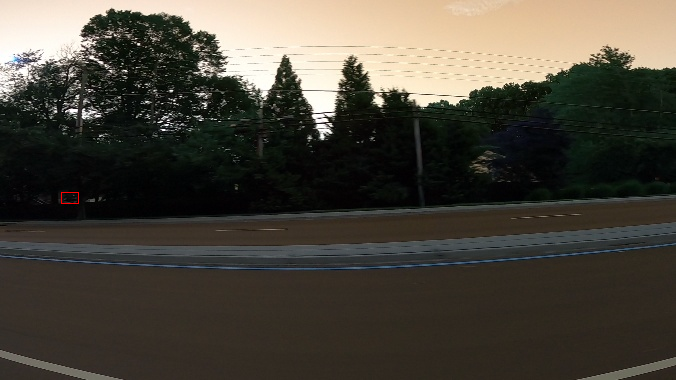

In [ ]:
vshape[0]

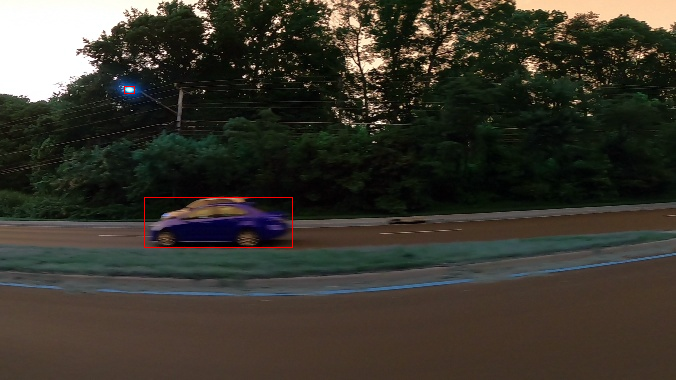

In [ ]:
vshape[44]

In [ ]:
ONNX_output = '/content/fastercnn_resenet_fpn.onnx'
input_shape = (1, 3, 640, 640)
dummy_input = torch.randn(input_shape)
torch.onnx.export(CNN_MODEL, dummy_input, ONNX_output, opset_version=12)
print(f"ONNX model saved at: {ONNX_output}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/detection/generalized_rcnn.py:75: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  for img in images:
/usr/local/lib/python3.10/dist-packages/torchvision/models/detection/transform.py:122: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  images = [img for img in images]
/usr/local/lib/python3.10/dist-packages/torchvision/models/detection/transform.py:167: TracerWarning: torch.as_tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call t

OnnxExporterError: Module onnx is not installed!